# Making predictions with BlazeFace

This notebook shows how to use the model for face detection.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import torch
import cv2

In [3]:
print("PyTorch version:", torch.__version__)
print("CUDA version:", torch.version.cuda)
print("cuDNN version:", torch.backends.cudnn.version())

PyTorch version: 1.6.0
CUDA version: 10.2
cuDNN version: 7605


In [4]:
gpu = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
gpu

device(type='cuda', index=0)

## Load the model

In [5]:
from irislandmarks import IrisLandmarks

net = IrisLandmarks().to(gpu)
net.load_weights("irislandmarks.pth")

## Make a prediction

The input image should be 64x64. BlazeFace will not automatically resize the image, you have to do this yourself!

In [6]:
img = cv2.imread("test_eye.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (64, 64))

In [8]:
eye_gpu, iris_gpu = net.predict_on_image(img)
eye = eye_gpu.cpu().numpy()
iris = iris_gpu.cpu().numpy()
eye.shape
iris.shape

(1, 5, 3)

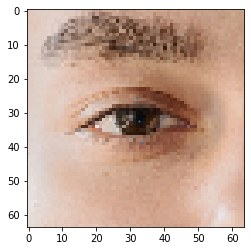

In [10]:
plt.imshow(img, zorder=1)
x, y = iris[:, :, 0], iris[:, :, 1]
plt.scatter(x, y, zorder=2, s=1.0)
plt.show()

Let's convert model to ONNX format

In [10]:
torch.onnx.export(
    net, 
    (torch.randn(1,3,64,64, device='cpu'), ), 
    "irislandmarks.onnx",
    input_names=("image", ),
    output_names=("preds", "conf"),
    opset_version=9
)

/Users/george/Library/Mobile Documents/com~apple~CloudDocs/Projects/matt-research/snapchat_like/MediaPipe-PyTorch/facemesh.py:113: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  print(x.shape)


torch.Size([1, 3, 193, 193])
